# Advanced data analysis: group project

By delivering this notebook, we confirm that the code presented was developed by the following students.

## Student 1: João Gonçalves, 51268
## Student 2: Artem Klein, 52943


In the solutions for exercises 1 to 5 you should include necessarily one solution using Pandas/scikit learn and one using Spark.

Some useful links:
* [ACM DEBS 2015 Grand Challenge](http://www.debs2015.org/call-grand-challenge.html)

* [Pandas documentations](https://pandas.pydata.org/docs/)

* [scikit-learn](https://scikit-learn.org/stable/)

* [Spark web site](https://spark.apache.org/)

* [Spark MLlib main page](https://spark.apache.org/mllib/)
* [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)

* [Spark GraphX main page](https://spark.apache.org/graphx/)
* [Spark GraphFrames main page](https://graphframes.github.io/graphframes/docs/_site/index.html)
* [Spark GraphFrames User Guide](https://graphframes.github.io/graphframes/docs/_site/user-guide.html)

Run the following cell just to check if it is running in COLAB.

In [1]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules

## Install software

The following cell will install Spark, if the notebook is running on COLAB. 

Before running this cell, you should access the following link [https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing](https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing) and "Add Shortcut to Drive".


In [2]:
# Install needed software
# Run this cell once before running the other cells in the notebook
if IN_COLAB:
    !apt-get install openjdk-11-jdk-headless
    !pip install pyspark    

!pip install gdown
!mkdir checkpoint



Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.17+8-1ubuntu2~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 27 kB/s 
     |████████████████████████████████| 199 kB 43.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=13eee1719581e76e5078c1b7f82e5580f4ae73d51ef2356cb4e78be16b3f8c0a
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars graphframes-0.8.2-spark3.2-s_2.12.jar pyspark-shell'


--2022-12-04 11:36:06--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 18.154.110.115, 18.154.110.33, 18.154.110.122, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|18.154.110.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.03s   

2022-12-04 11:36:06 (7.30 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



## Setup Data

The first time you run the notebook, before running this cell, you should access the following link https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing and select the "Add Shortcut to Drive". This will add a shortcut to the datasets to your Google Drive.

The following cell will mount the directory into Colab environment, so that it can be accessed as a local file.


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
#Select the dataset you want to use by uncommnting the appropriate line and running this cell

#Small dataset 100K lines
#FILENAME="/content/drive/MyDrive/group2223/tiny.csv"

#Default dataset 2M lines
FILENAME="/content/drive/MyDrive/group2223/sample.csv"

#Huge dataset 173M lines - use only in exercise 0
#FILENAME="/content/drive/MyDrive/group2223/sorted_data.csv"



### Alternative way to access data

Alternatively you can access data by downloading the data into the colab running environment. The following sets download different datasets - download the one you need.

Run the following cell to download a **tiny** dataset. You can download it to you computer using this URL: https://drive.google.com/file/d/12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ



In [ ]:
!gdown 12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
!unzip -u tiny.csv.zip
!rm tiny.csv.zip
FILENAME="tiny.csv"


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 377, in _make_request
TypeError: getresponse() got an unexpected keyword argument 'buffering'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/gdown/cli.py", line 166, in main
    resume=args.continue_,
  File "/usr/local/lib/python3.7/dist-packages/gdown/download.py", line 146, in download
    res = sess.get(url, headers=headers, stream=True, verify=verify)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 543, in get
    return self.request('GET', url, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 530, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/requests/sessions.py", line 643, in 

Alternatively, run the following cell to download the **default** dataset. You can download the file to your computer using this URL: 
https://drive.google.com/file/d/1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A

In [ ]:
!gdown 1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A
!unzip -u sample.csv.zip
!rm sample.csv.zip
FILENAME="sample.csv"


Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A 

unzip:  cannot find or open sample.csv.zip, sample.csv.zip.zip or sample.csv.zip.ZIP.
rm: cannot remove 'sample.csv.zip': No such file or directory


You can still run the following cell (this will take some time) to download a **huge** dataset - with 33GB !!! You can download the file to you computer using this URL: https://drive.google.com/file/d/1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5/view?usp=share_link

Use this dataset **only** for computing the result of exercise 0.

In [ ]:
!gdown 1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5
!unzip -u sorted_data.csv.zip
!rm sorted_data.csv.zip
FILENAME="sorted_data.csv"


Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5 

unzip:  cannot find or open sorted_data.csv.zip, sorted_data.csv.zip.zip or sorted_data.csv.zip.ZIP.
rm: cannot remove 'sorted_data.csv.zip': No such file or directory


## Initialization

import libraries.

In [24]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.style.use('seaborn')


Let's start spark session and set *log* level to ERROR.

In [25]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Group project") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.driver.memory", "12g") \
    .getOrCreate()

if IN_COLAB : 
    spark.sparkContext.addPyFile('graphframes-0.8.2-spark3.2-s_2.12.jar')
else:
    spark.sparkContext.addPyFile('/usr/local/spark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')

spark.sparkContext.setCheckpointDir("checkpoint")


## Simple statistics

First program prints simple statistics.

In [26]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

statistics = spark.sql( """SELECT COUNT( DISTINCT medallion) AS num_medallion, 
                                  COUNT( DISTINCT hack_license) AS num_license,
                                  MIN( pickup_datetime) AS min_pickup,
                                  MAX( dropoff_datetime) AS max_dropoff,
                                  MAX( trip_time_in_secs) AS max_trip_time,
                                  MAX( trip_distance) AS max_trip_distance,
                                  MAX( total_amount) AS max_total_amount
                                  FROM data""")
statistics.show()


+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|num_medallion|num_license|         min_pickup|        max_dropoff|max_trip_time|max_trip_distance|max_total_amount|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|        10867|      20354|2013-01-01 00:00:00|2013-01-21 00:11:45|        10800|            95.85|           465.0|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+



## Ploting information

Example on how to plot information using matplotlib.

### First plot

This first plot helps showing that data has several invalid values.

Let's plot the pickups - you can see that there are points quite far from the expected locations. 

Plotting pickups


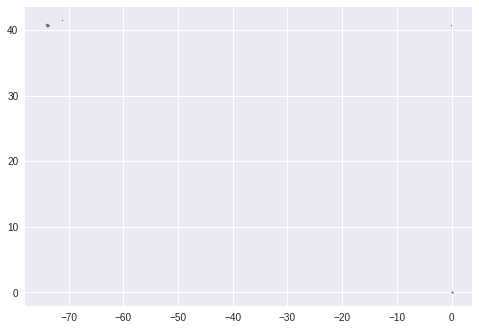

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

# Plotting all points is probably too much in many computers, so lets plot only a few 1000's
data = spark.sql( "SELECT * FROM data LIMIT 1000")
pickups = data.collect()

print('Plotting pickups')
plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            s=1)
plt.show()


### Plotting heatamps

This example shows how to **plot heatmaps** and how to **create a grid** with coordinates -- note that we need to group nearby coordinates together or (almost) every coordinate will be unique.

The example creates a grid, with cell of 150m of side (commented out the code for cells of 500m of side). It also filters out data that is outside of the area of interest - defined by northLatitude, southLatitude, westLatitude, eastLatitude coordinates.

\[From ACM DEBS 2015 Grand Challenge page\]

**Question 1**: Is the earth flat or how to map coordinates to cells?

**Answer**: For the challenge we allow a simplified flat earth assumption for mapping coordinates to cells in the queries. You can assume that a distance of 500 meter south corresponds to a change of 0.004491556 degrees in the coordinate system. For moving 500 meter east you can assume a change of 0.005986 degrees in the coordinate system.

Plotting pickups


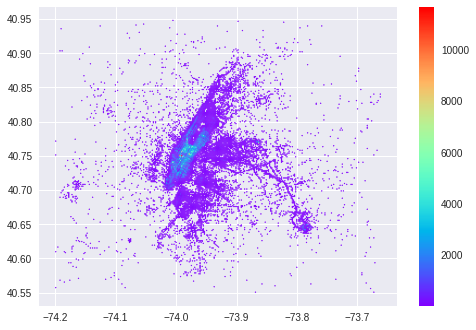

Plotting dropoffs


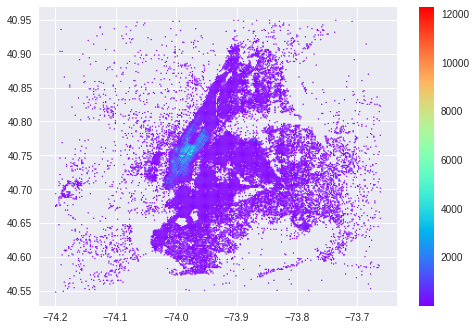

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 500 meters
#latitudeStep = 0.004491556
#longitudeStep = 0.005986
#northLatitude = 41.474937 - 0.5 * latitudeStep
#southLatitude = northLatitude - 300 * latitudeStep
#eastLongitude = -74.913585 - 0.5 * longitudeStep
#westLongitude = eastLongitude + 300 * longitudeStep

# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

# Frequency for pickups
pickupsDF = spark.sql( """SELECT pickup_longitude, pickup_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY pickup_longitude, pickup_latitude""")
pickups = pickupsDF.collect()

print('Plotting pickups')
p = plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            c=[row.cnt for row in pickups],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()

# Statistics for dropoffs
dropoffsDF = spark.sql( """SELECT dropoff_longitude, dropoff_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY dropoff_longitude, dropoff_latitude""")
dropoffs = dropoffsDF.collect()

print('Plotting dropoffs')
p = plt.scatter([row.dropoff_longitude for row in dropoffs],
            [row.dropoff_latitude for row in dropoffs],
            c=[row.cnt for row in dropoffs],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()



## Exercise 0: another simple statistics

This example computes, for each license, the number of trips performed.

We have the code using Spark and Pandas, printing the time for doing the computation.
**Draw some conclusions** by comparing the time for performing the computation using Spark and Pandas, and also when using the different datasets - **Make sure you run each cell more than once and write down the last value**.

### Code: Spark

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

start_time = time.time()
mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")
statistics = spark.sql( """SELECT hack_license, COUNT(*) AS cnt FROM data GROUP BY hack_license""")
statistics.show()

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


+--------------------+---+
|        hack_license|cnt|
+--------------------+---+
|130328475AD7427AF...|125|
|D4F2AE0988ECB2E42...|190|
|DD97899ACAC51EF31...| 27|
|A7C47E60941315A0E...|224|
|9911D66A4A796752D...|148|
|88CB7A1006DB18438...|129|
|069B5562096AF7684...|129|
|28A7C858D9231A3EC...|148|
|A7EE9AEDB7325F55F...|185|
|4B6EFCBC110DB539E...|113|
|AA33AA1CACC8C26E7...|177|
|921E1C7C91CDCF1C6...| 78|
|616E057B1ACDB7B28...|162|
|EFA12B2F45FC838E1...|153|
|D0D1271283601BF84...|199|
|138B0A7B7D3B898E4...|134|
|0FBF11956EE14B253...|155|
|8821CA9250E34A869...|141|
|BE047851D97506885...|  7|
|02856AFC22881ABCA...|186|
+--------------------+---+
only showing top 20 rows

Runtime = 7.038836479187012


### Results (Spark)

**Tiny dataset**

The time to process the dataset was : **0.89** seconds.

**Default dataset**

The time to process the dataset was : **5.52** seconds.


**Large dataset**

The time to process the dataset was : **611.62** seconds.


### Code: Pandas library

In [ ]:
start_time = time.time()
mySchema = ["medallion", "hack_license", "pickup_datetime",
            "dropoff_datetime", "trip_time_in_secs", "trip_distance",
            "pickup_longitude", "pickup_latitude", "dropoff_longitude",
            "dropoff_latitude", "payment_type", "fare_amount", 
            "surcharge", "mta_tax", "tip_amount",
            "tolls_amount", "total_amount"]

dataset = pd.read_csv(FILENAME,names=mySchema)
result = dataset.groupby("hack_license").count()
print(result)

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


                                  medallion  pickup_datetime  \
hack_license                                                   
0008B3E338CE8C3377E071A4D80D3694        129              129   
000B8D660A329BBDBF888500E4BD8B98          2                2   
000CCA239BFDC0ABE2895AC9086C4290         11               11   
00184958F5D5FD0A9EC0B115C5B55796         62               62   
001C8AAB90AEE49F36FCAA7B4136C81A        178              178   
...                                     ...              ...   
FFF5AD65C673251C1F275CF5B43EC414          2                2   
FFF6401CC16911710E7590FE197E986A         33               33   
FFF657CFEC6A06384C97ACB500916913         68               68   
FFF909B1353148850AD3E40BB878618B        124              124   
FFFBCEA3D4E21E05902EE67AD556F67C        177              177   

                                  dropoff_datetime  trip_time_in_secs  \
hack_license                                                            
0008B3E338CE8C3377E07

### Results (Pandas)

**Tiny dataset**

The time to process the dataset was : **2.22** seconds.

**Default dataset**

The time to process the dataset was : **24.13** seconds.

**Large dataset**

The time to process the dataset was : **Crashed during the proccess, the collab can't handle the dataset due to its ram size**

### Results discussion

Pandas DataFrame is powerful when it comes to manipulating data, but it has his limits. In terms of processing speed, Pandas is slower than Spark, but not tremendously for the tiny and default dataset. But when data is growing, data processing in Pandas reaches its limits, as it crashed in our case for the large dataset. Thus, Spark performs increasingly better in large datasets, mainly because data processing is distributed and performed in parallel by multiple nodes. Moreover, Pandas Dataframe doesn't support parallelization and distributed computing, which makes Spark more suitable, as it is an open-sourced cluster computing framework.

## Exercise 1

Let's start by trying to help the city to identify which new bus routes should be introduced. To this end, you should find the most frequent routes whose distance is above a given treshold (defined by you).

For establishing these routes, we suggest that you use a grid of 500m of side.

In [ ]:
import matplotlib.pyplot as plt
import time
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.linalg import Vectors

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 500 meters
latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_distance > 0.01 AND
                                  trip_time_in_secs > 30 AND
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")


In [ ]:
routes = spark.sql("""SELECT pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, count(*) AS cnt 
FROM data
WHERE trip_distance > 2
GROUP BY 1,2,3,4
ORDER BY cnt DESC
LIMIT 20""")

routes.show()

+----------------+------------------+-----------------+------------------+---+
|pickup_longitude|   pickup_latitude|dropoff_longitude|  dropoff_latitude|cnt|
+----------------+------------------+-----------------+------------------+---+
|      -73.872021| 40.77425426399999|       -73.973783|40.756288039999994|667|
|      -73.985755| 40.76077959599999|       -73.872021| 40.77425426399999|526|
|      -73.872021| 40.77425426399999|       -73.979769| 40.76077959599999|505|
|      -73.872021| 40.77425426399999|       -73.985755| 40.76077959599999|499|
|      -73.872021| 40.77425426399999|       -73.985755|40.756288039999994|499|
|      -73.872021| 40.77425426399999|       -73.973783| 40.75179648399999|482|
|      -73.979769| 40.76077959599999|       -73.872021| 40.77425426399999|452|
|      -73.991741| 40.75179648399999|       -73.955825| 40.76527115199999|428|
|      -73.973783|40.756288039999994|       -73.872021| 40.77425426399999|424|
|      -73.872021| 40.77425426399999|       -73.9797

### Discussion

*Code*

- First, we use the pickup and dropoff location in order to find out which routes have been travelled

- Aferwards, we count the number of identical routes in order to determine the routes that were used most frequently

- As a distance threshold we have chosen 2 miles, as we assume that this would be the distance a person would still be willing to walk before opting to take a bus

- Then, we group all data by pickup AND dropoff locations to determine identical routes and then to count these

- Finally, we return the count in descent order to show the most frequently travelled routes

*Output*

- We have limited our output by 20 and ordered it in a descending order by the number of pickups per squares of 500 meters
- The most frequently travelled route is route 667 followed by routes 526 and 505
- Thus, if the city would like to limit the number of taxis, they could implement a bus route which should go from (-73.872021| 40.77425426399999) to (-73.973783|40.756288039999994), as most people use a taxi on this route

## Exercise 2

The taxi trips can be classified in two categories, depending on whether the client has given a tip or not (or alternatively in three categories - no tip, low percentage tip, high percentage tip). Propose a method to predict the class of a given trip (for the prediction, you cannot use the value of the tip).


In [47]:
df = dataset.toPandas()
#Calculate the Average of Tip_amount
tip_mean = df["tip_amount"].mean()
#Create new Column with the category of the tip, 1 is no tip, 2 is low tip and 3 is high tip
df["tip_category"] = 1
#Metric used to divide between low and high tip is the Mean, if its above the mean its hight otherwise its low
df.loc[(df["tip_amount"] < tip_mean) & (df["tip_amount"] != 0) ,"tip_category"] = 2
df.loc[df["tip_amount"] >= tip_mean,"tip_category"] = 3

In [51]:
X = df.drop(['tip_amount','tip_category','medallion','hack_license','payment_type','pickup_datetime','dropoff_datetime'], axis = 1) # Features
y = df['tip_category'] # Target variable

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 352.48, 'Predicted label')

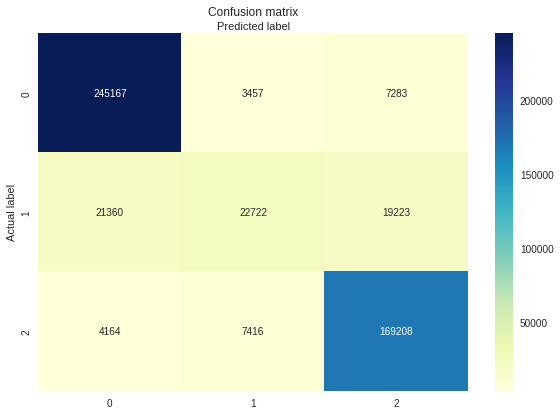

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print("Precision:",metrics.precision_score(y_test, y_pred, average="micro"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="micro"))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Precision: 0.874194
Recall: 0.874194
Accuracy: 0.874194


### Discussion

**Rationale**

- We calculated the average of the tip_amount and created new columns with different tip categories, such as no tip, low tip, and high tip
- The metric, which is used to differentiate between the low and the high tip, is the mean
- Above the mean is the high tip, and below the mean is the low tip
- Use a logistic regression to fit our model
- Analyze the Confusion Matrix
    
**Code**
- First of all, we calculate the average of the tip_amount
- Afterwards, we create a new column with the categories of the tip, no tip, low tip, and high tip
- Then, we divided the dataset into a training set and a test set 
- The next step is to fit our model on the train set using fit() and perform prediction on the test set using predict()
- Finally we plot our confusion matrix
- Moreover, we print the values of the, Precision, Recall and Accuracy

**Explain the Meaning of the Scores**

*Precision* 

- Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. With a precision of 0.87 we can conclude that our model is very accurate meaning that it is predicting very well the category of a tip.

*Recall*

- Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

*Accuracy*

- Accuracy is a metric that describes how the model performs across all classes. It is useful when all classes are of equal importance.

**Results**

Regarding all of these scores we can conclude that our model is very good, because most of the predictions are well classified. The Category that had more problems being predicted was the low tip, however we can conclude that the model sucessfully predicted if the customer would give tip or not, this can be assumed from the 2x2 square on the bottom right, meaning that in 19223 + 7416 it didn't predict well the category but at least it predicted that the customer would give a tip.

## Exercise 3

The third question intends to help taxi drivers to decide to which area of the city they should go next. To this end, we could have a web site/mobile app where the drivers could check the best area at a given moment. To support such application efficiently, it would be necessary to have a pre-computed index with the value for each area and period of time (e.g. combining the week day and a period of one hour). 

You should create the program to create such index. The output tuples should be something like: longitude latitude day_of_week hour value.

Define your own metric for the value of an area. Parameters that may be included in such metric include: the number of pickups in the area, the amount collected in the trip, the average time a taxi is idle in the area, etc.

Besides presenting the code, explain the rationale of your solution.

**Note:** SQL functions date(col), dayofweek(col) and hour(col) return, respectively, the date, day of week and hour of a datatime in column col.

In [ ]:
q2_aux = spark.sql("""

WITH 
income_table AS 
    (
    SELECT day, hour, pickup_longitude, pickup_latitude, 
        CASE
            WHEN metric_i = 1 THEN +1
            WHEN metric_i = 2 THEN +2
            WHEN metric_i = 3 THEN +3
            WHEN metric_i = 4 THEN +4
            WHEN metric_i = 5 THEN +5
            ELSE NULL
        END AS metric1
    FROM
        (
        SELECT day, hour, pickup_longitude, pickup_latitude, 
               NTILE(5) OVER (ORDER BY income) AS metric_i
        FROM
            (
            SELECT dayofweek(pickup_datetime) day,
                    hour(pickup_datetime) hour, 
                    pickup_longitude, 
                    pickup_latitude, 
                    AVG(fare_amount)+AVG(tip_amount) AS income,
                    count(fare_amount) 
            FROM data
            GROUP BY 1,2,3,4
            )
        )
    ),
busy_table AS
    (
    SELECT day, hour, pickup_longitude, pickup_latitude, 
        CASE
            WHEN metric_b = 1 THEN +1
            WHEN metric_b = 2 THEN +2
            WHEN metric_b = 3 THEN +3
            WHEN metric_b = 4 THEN +4
            WHEN metric_b = 5 THEN +5
            ELSE NULL
        END AS metric2
    FROM
        (
        SELECT day, hour, pickup_longitude, pickup_latitude, 
               NTILE(5) OVER (ORDER BY busy) AS metric_b
        FROM
            (
            SELECT pickup_longitude, pickup_latitude, dayofweek(pickup_datetime) day, hour(pickup_datetime) hour, 
                   AVG(triptime)/60 busy, count(*) count
            FROM
                (
                SELECT medallion, hack_license, pickup_datetime, dropoff_datetime, pickup_longitude, pickup_latitude, 
                       SUM(trip_time_in_secs)/60 triptime
                FROM data
                WHERE pickup_longitude != 0
                GROUP BY 1,2,3,4,5,6
                )
            GROUP BY 1,2,3,4
            ORDER BY busy
            )
        WHERE count > 10
        )
    )                    
SELECT i.pickup_longitude, i.pickup_latitude, i.day, i.hour, i.metric1+b.metric2 metric
FROM income_table i
JOIN busy_table b 
    ON i.pickup_longitude = b.pickup_longitude 
    AND i.pickup_latitude = b.pickup_latitude
    AND i.day = b.day
    AND i.hour = b.hour
                    """)

q2_aux.createOrReplaceTempView("q2_ee")

# Randomly we are going to slect the day 6
q2_final = spark.sql("""SELECT pickup_longitude, pickup_latitude, day,hour, metric 
FROM q2_ee
WHERE day = 6
ORDER BY metric DESC
          """)

q2_final.show()



+------------------+------------------+---+----+------+
|  pickup_longitude|   pickup_latitude|day|hour|metric|
+------------------+------------------+---+----+------+
|        -73.973783|40.756288039999994|  6|   4|    10|
|        -73.991741| 40.76077959599999|  6|   4|    10|
|        -73.979769| 40.76077959599999|  6|   5|    10|
|        -73.979769| 40.75179648399999|  6|   2|    10|
|-74.01568499999999|40.711372479999994|  6|   6|    10|
|        -73.979769|40.756288039999994|  6|   3|    10|
|-74.01568499999999| 40.71586403599999|  6|  16|    10|
|        -73.973783|40.756288039999994|  6|   5|    10|
|        -74.009699| 40.70238936799999|  6|  12|    10|
|        -74.003713| 40.72933870399999|  6|   4|    10|
|        -74.003713| 40.72933870399999|  6|   5|    10|
|        -73.985755| 40.76077959599999|  6|   5|    10|
|        -74.009699|40.738321815999996|  6|   3|    10|
|        -74.009699|40.711372479999994|  6|   1|    10|
|        -73.985755| 40.76077959599999|  6|   4|

### Discussion

**Rationale**

In our case , we have chosen two variables to create an index from 1-10

- Variable 1: Income - The average fare and tip ammount per area, day and hour
    - The larger the amount, the higher the index
- Variable 2: Percentage of average busy time - Average time a driver is occupied per hour
    - The higher the percentage, the higher the index
    
**Code**

The code is based on three elements: income_table, busy_table, and where both tables are joined and the value is created:

- income_table
    - we split the average income per area, day, and hour into 5 percentiles and assign an index from 1 to 5
- busy_table
    - Same as income, we use the percentile to assisgn a value from 1 to 5
    - Moreover, we calculate the percentage busy time by taking the average time (in minutes) a driver is busy within one hour and dividing this by 60 to receive a percentage business
    - The code groups by pickup coordinates, day, and hour
- join both tables and sum their index value to get a final index 
    - The final element joins the busy and income tables and sums their values in order to create the final index. It is based on coordinates, day of week, and hours
    
Finally, we print the table for day 6 (randomly selected) and order it by the descending metric

**Results**
- Our output provides the pickup longitude and latitude, hours, and the metric (10 ist the most attractive area for a given time) for day 6
- For example, it seems that the airport might be a very busy area in the morning hours
- Therefore, our results provide a way for drivers to identify when certain areas are busy. Nevertheless, it is important to consider the current location of the drivers when it comes to deciding where to go next

## Exercise 4

The fourth question intends to help define the location of taxi ranks (the places where taxis stop waiting for collecting clients) in a way that tries to minimize the distance a client needs to travel to reach the taxi rank.

Consider that you want to establish, at least, 100 taxi ranks but no more than 150 - present the code that defines the number and locations of the ranks.

**Note:** This dataset is for NYC taxis. So, pickups outside of the city are infrequent and not representative of the demand in such areas. As such, you should focus on pickups in a square that includes NYC (it is ok if the square includes parts outside of the city). Use, for example, the following square:
```
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92
```

**Suggestion:** Plot your results as a heatmap, with the color being a measurement of the value of the taxi rank; use the visual feedback to enhance your solution.

In [ ]:
# Applying the grid of 150 meters (therefore increasing the amount of locations to consider) in order to increase the proximity between ranks

latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound(val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound(l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

dataset.createOrReplaceTempView("data")

filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))

filteredDataDF.createOrReplaceTempView("data")



The number of clusters to obtain the highest quality score is:
 118


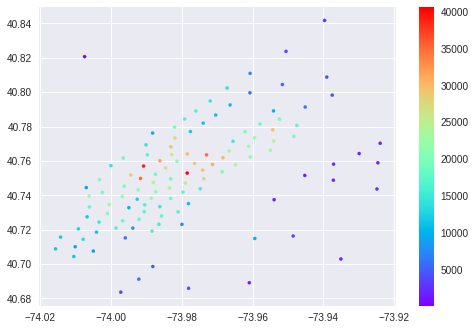

In [ ]:
dataset.createOrReplaceTempView("data")

dataset = spark.sql(""" 
                    SELECT *
                    FROM data
                    WHERE pickup_latitude >= 40.68 AND pickup_latitude <= 40.86 AND pickup_longitude >= -74.03 AND pickup_longitude <= -73.92""")

assembler = VectorAssembler(inputCols=('pickup_longitude','pickup_latitude'),outputCol="features")
dataset = assembler.transform(dataset)

standsdf = pd.DataFrame(columns=['stands', 'score'])

# For each value from 100 to 150 compute the clusters and the score
for i in range (100, 151):
    # Initialize the algorithm for i clusters
    kmeans = KMeans().setK(i).setSeed(1)
    # Generate a model from the dataset
    model = kmeans.fit(dataset) 
    centers = model.clusterCenters()
    # Assign each element of the data set to a cluster number
    predictions = model.transform(dataset)
    # Evaluate the quality of the prediction
    evaluator = ClusteringEvaluator() 
    evaluator.setPredictionCol("prediction")
    #Store the quality score in a Dataframe
    standsdf = standsdf.append({"stands": i, 
                                  "score": evaluator.evaluate(predictions)}, 
                                  ignore_index = True) 

#Get the number of clusters which the score is the highest that leads to a better result
idealnrstands = int(standsdf.nlargest(1,"score")["stands"].values[0])

print("The number of clusters to obtain the highest quality score is:\n", idealnrstands)

# Training KMeans
kmeans = KMeans().setK(idealnrstands).setSeed(1) 
model = kmeans.fit(dataset)
#Get Centers
centers = model.clusterCenters() 

#Store the centers in a Dataframe
centers_df = pd.DataFrame(np.vstack(centers), columns=["longitude", "latitude"]) 
centers_df["index_cluster"]=centers_df.index

centersDF = spark.createDataFrame(centers_df)
centersDF.createOrReplaceTempView("centers_cluster")
    
# Assign each element of the data set to a cluster number
predictions = model.transform(dataset)
predictions.createOrReplaceTempView("predictions") 

#Groupby the predictions using descend order based on the prediction
center_count = spark.sql("""SELECT prediction, 
                            COUNT(*) AS cnt 
                            FROM predictions 
                            GROUP BY prediction
                            ORDER BY prediction DESC""")
center_count.createOrReplaceTempView("center_count")

#Merge the DataFrames with inner join
df = spark.sql("""SELECT longitude, latitude, cnt
                    FROM centers_cluster
                    INNER JOIN center_count
                    ON centers_cluster.index_cluster = center_count.prediction""")
stand = df.collect()

#Plot centers of each cluster
p = plt.scatter([row.longitude for row in stand],
            [row.latitude for row in stand],
            c=[row.cnt for row in stand],s=10,cmap="rainbow")
plt.colorbar(p)
plt.show()

### Discussion

**Rationale**

Our data helps us to understand where customers get on a taxi. In our process, we would like to find one or multiple centers where the distance for each customer to reach a certain point would be minimized. To find those "taxi stands", k-MEANS clustering is helpful. It is important to find the ideal number of centroids and also to identify the best centroids according to the minimum distance that most people would have to travel to the centroid.

**Code**

We are implementing a loop which is ranging from 100 to 150, to identify how many stands would be ideal. As presented in the lecture, the lower the prediction, the better. Therefore, we consider the number of centroids with the lowest value. Afterwards, we fit the coordinates of the pickup locations to the according centroids. Then, we count the number of pickups which would occur at a certain location and finally, we plot the centers of each cluster.


**Results**

In our case 118  new taxi stands in New York City are ideal. Our plot shows that the distribution of these stands is in Manhattan. It is not suprising, because most pickups also occur in Manhattan. Nevertheless, some stands occur outside the city as well, but in our case, we focussed more on the city center.


## Exercise 5

Analyze the movement patterns by taxi routes in order to find communities in New York

In [ ]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *

spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
# Squares of 500 meters
#latitudeStep = 0.004491556
#longitudeStep = 0.005986
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE trip_distance > 0.01 AND
                                  trip_time_in_secs > 30 AND
                                  trip_distance <=1.6 AND 
                                  pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

In [ ]:
preprocDF = spark.sql( """SELECT 
                          concat('(',pickup_longitude,',',pickup_latitude,')') AS src, 
                          concat('(',dropoff_longitude,',',dropoff_latitude,')') AS dst,
                          pickup_longitude, pickup_latitude,
                          dropoff_longitude, dropoff_latitude 
                          FROM data""")

preprocDF.createOrReplaceTempView("data2")


edges = spark.sql( """SELECT src, dst , 'trip' FROM data2""")

edges.createOrReplaceTempView("edges")

vertex = spark.sql( """SELECT src as id, pickup_longitude as longitude, pickup_latitude as latitude FROM data2
                        UNION
                        SELECT dst as id, dropoff_longitude as longitude,dropoff_latitude as latitude FROM data2""")

vertex.createOrReplaceTempView("vertex")


In [ ]:
from graphframes import *

g = GraphFrame(vertex, edges)

motifs = g.find("(a)-[e]->(b); (b)-[e2]->(a)") 
motifs.show()

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+--------------------+--------------------+--------------------+--------------------+
|                   a|                   e|                   b|                  e2|
+--------------------+--------------------+--------------------+--------------------+
|{(-73.93212890000...|{(-73.93212890000...|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.93212890000...|{(-73.93212890000...|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.92494570000...|{(-73.92494570000...|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.9195583,40....|
|{(-73.9195583,40....|{(-73.9195583,40....|{(-73.91955

In [ ]:
result = g.labelPropagation(maxIter=5)
result.show()

result.createOrReplaceTempView("result")

+--------------------+------------------+-------------+-------------+
|                  id|         longitude|     latitude|        label|
+--------------------+------------------+-------------+-------------+
|(-73.9500869,40.7...|       -73.9500869|40.7299694538| 652835029005|
|(-73.9500869,40.7...|       -73.9500869|40.7030201178| 652835029005|
|(-73.9357205,40.7...|       -73.9357205|40.7636561238|  94489280512|
|(-73.9500869,40.7...|       -73.9500869| 40.762308657|1185410973714|
|(-74.0075525,40.7...|       -74.0075525| 40.775783325| 403726925837|
|(-73.9842071,40.6...|       -73.9842071|40.6935878502| 979252543494|
|(-73.9213541,40.8...|       -73.9213541|40.8512414658| 128849018880|
|(-73.9913903,40.7...|       -73.9913903|40.7326643874|1185410973714|
|(-73.9985735,40.7...|       -73.9985735|40.7569187898|1185410973714|
|(-73.9267415,40.7...|       -73.9267415|40.7434441218| 515396075522|
|(-73.939312100000...|-73.93931210000001| 40.715147319| 652835029005|
|(-73.9626575,40.8..

In [ ]:
q4_final = spark.sql("""
WITH count_filter    
    (
    SELECT * 
    FROM 
        (
        SELECT label,
               COUNT(*) as count 
        FROM result
        GROUP BY 1
        ORDER BY 2 DESC
        )
    WHERE count > 50
    )
SELECT result.*, count_filter.count
FROM result
INNER JOIN count_filter
    ON result.label = count_filter.label
""").collect()

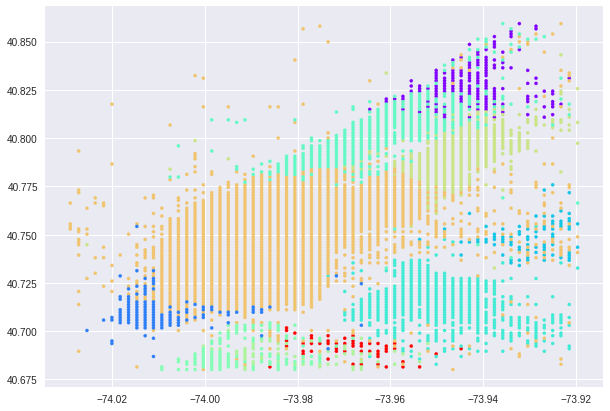

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter([row.longitude for row in q4_final],[row.latitude for row in q4_final],
            c=[row.label for row in q4_final], s=10,cmap='rainbow') 

### Discussion

**Rationale**
- For the last question, we want to analyze the movement patterns by taxi routes in order to find communities in New York
- In our case, we considered only short trips which are shorter than 1.6 km which provides the richest information
    
**Code**
- First, we clean the data with an additional condition trip_distance <= 1.6
- Second, we prepare two dataframes: One with the vertex and the other one with the edges
- Afterwards, we create the graphframe
- To retrieve proper information from this graphframe, we use the g.find expression which searches for pairs of verticles, connected by respective edges
- With that, we create a dataframe with these structures
- Then, we apply an algorithm (Label Propagation Algorithm) which detects communities in networks. It assigns a label for each coordinate indicating to which community the coordinates belong
- Finally, we remove labels which occur less than 50 times
- In the end, we are plotting the communities with different colors

**Results**
- We found out that New York has one major community (beige), three medium sized communities, and some small communities
- These results can definitely be improved as they are based on several assumptions